In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager
from textwrap import wrap
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# settings
pd.set_option('display.max_rows', None)

In [2]:
# theme

# use lato font
font_path = 'Lato/Lato-Regular.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

# set colors
col_yellow = '#ffa400'
col_green = '#256143'
col_brown = '#9c5421'
col_off_black = '#434343'
mpl.rcParams['text.color'] = col_off_black # title and legend
mpl.rcParams['xtick.color'] = col_off_black # tick marks
mpl.rcParams['ytick.color'] = col_off_black # tick marks
mpl.rcParams['axes.labelcolor'] = col_off_black # axes labels

# set font sizes
mpl.rcParams['axes.titlesize'] = 13 # title
mpl.rcParams['axes.labelsize'] = 12 # axes labels
mpl.rcParams['xtick.labelsize'] = 11 # tick marks
mpl.rcParams['ytick.labelsize'] = 11 # tick marks
mpl.rcParams['legend.title_fontsize'] = 12 # legend title
mpl.rcParams['legend.fontsize'] = 11 # legend text

# figure sizes (horizontal/vertical/square)
figsize_v = (6,10)
figsize_h = (10,6)

In [3]:

url = "https://raw.githubusercontent.com/mckenzie-maidl/wa-brewers-guild/main/Data/brewery_production_2022.csv"
# Check
df = pd.read_csv(url)
df.head(5)
# Cols
df.columns


Index(['brewery', 'brewery_type', 'address', 'city', 'zipcode', 'county',
       'latitude', 'longitude', 'year_established', 'guild_member',
       'closed_since_2022', 'untappd_profile_link', 'January', 'February',
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'total_annual'],
      dtype='object')

In [4]:
#url2='https://github.com/mckenzie-maidl/wa-brewers-guild/blob/main/Data/brewery_production_2022_melted_interpolated.csv'
url2='https://raw.githubusercontent.com/mckenzie-maidl/wa-brewers-guild/main/Data/brewery_production_2022_melted_interpolated.csv'
prod22_melted=pd.read_csv(url2)
#prod22_melted22=pd.read_csv(url2)
prod22_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brewery               5044 non-null   object 
 1   brewery_type          5044 non-null   object 
 2   address               5044 non-null   object 
 3   city                  5044 non-null   object 
 4   zipcode               5044 non-null   int64  
 5   county                5044 non-null   object 
 6   latitude              5044 non-null   float64
 7   longitude             5044 non-null   float64
 8   year_established      5044 non-null   int64  
 9   guild_member          5044 non-null   int64  
 10  closed_since_2022     5044 non-null   int64  
 11  untappd_profile_link  5044 non-null   object 
 12  month                 5044 non-null   object 
 13  production            4641 non-null   float64
 14  interpolated          5044 non-null   int64  
dtypes: float64(3), int64(

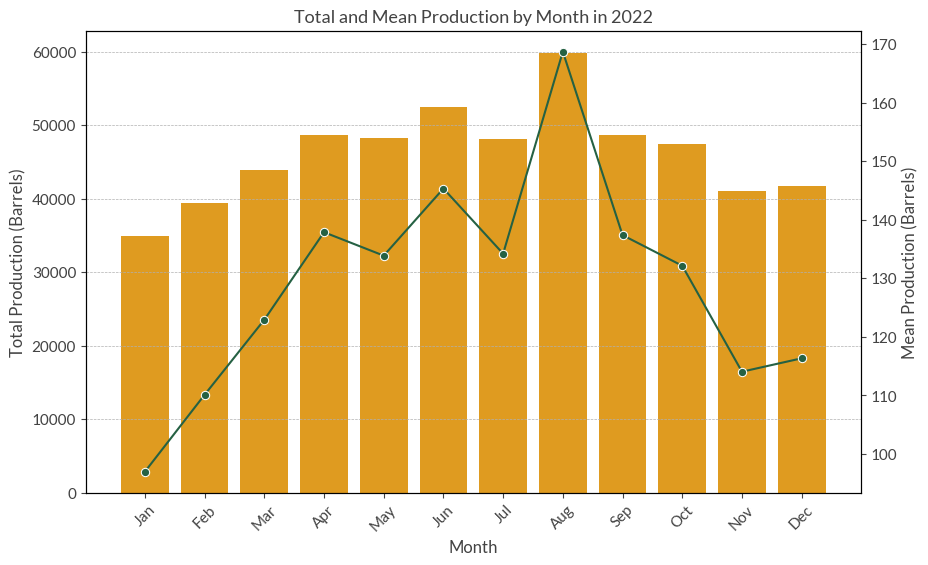

In [5]:


# order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_order_shortened=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# month to categorical with defined order
prod22_melted['month'] = pd.Categorical(prod22_melted['month'], categories=month_order, ordered=True)

# total production by month
total_production = prod22_melted.groupby('month')['production'].sum().reset_index()

# mean production by month calculation
mean_production = prod22_melted.groupby('month')['production'].mean().reset_index()

# Set up the figure
fig, ax1 = plt.subplots(figsize=figsize_h)

# Plot total production by month (bar plot)
sns.barplot(data=total_production, x='month', y='production', ax=ax1, color=col_yellow)
ax1.set_title('Total and Mean Production by Month in 2022')
ax1.set_xticklabels(month_order_shortened, rotation=45)
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Production (Barrels)')
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', linewidth=0.5)
#Rotation for readability
plt.xticks(rotation=45)

# secondary y-axis for mean production
ax2 = ax1.twinx()
sns.lineplot(data=mean_production, x='month', y='production', marker='o', ax=ax2, color=col_green)
ax2.set_ylabel('Mean Production (Barrels)')
ax2.tick_params(axis='y')

# 
plt.show()


In [6]:
print(mean_production.isnull().sum())

month         0
production    0
dtype: int64


In [7]:
prod22_melted.columns

Index(['brewery', 'brewery_type', 'address', 'city', 'zipcode', 'county',
       'latitude', 'longitude', 'year_established', 'guild_member',
       'closed_since_2022', 'untappd_profile_link', 'month', 'production',
       'interpolated'],
      dtype='object')

## Avoiding dual axis, side by side version of the above



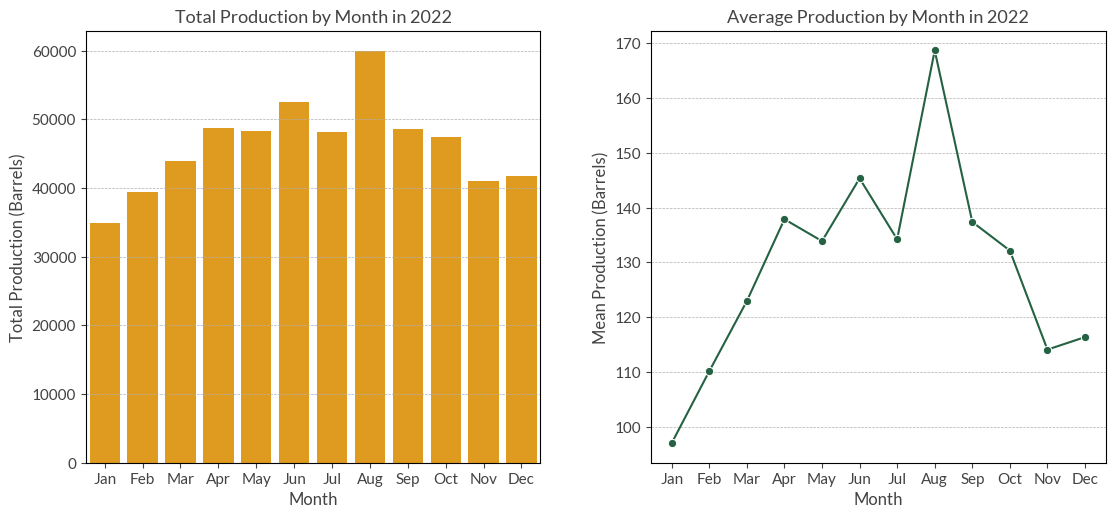

In [8]:

# Set up the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.tight_layout(pad=5.0)
axes[0].grid(axis='y', linestyle='--', linewidth=0.5)
axes[1].grid(axis='y', linestyle='--', linewidth=0.5)
# Plot total production by month (bar plot)
sns.barplot(data=total_production, x='month', y='production', ax=axes[0], color=col_yellow)
axes[0].set_title('Total Production by Month in 2022')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Production (Barrels)')
axes[0].set_xticklabels(month_order_shortened) #shorten
axes[0].tick_params(axis='x')

# mean production by month (line plot)
sns.lineplot(data=mean_production, x='month', y='production', marker='o', ax=axes[1], color=col_green)
axes[1].set_xticklabels(month_order_shortened)
axes[1].set_title('Average Production by Month in 2022')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Mean Production (Barrels)')


plt.show()


# Plot 2 : Count by production level

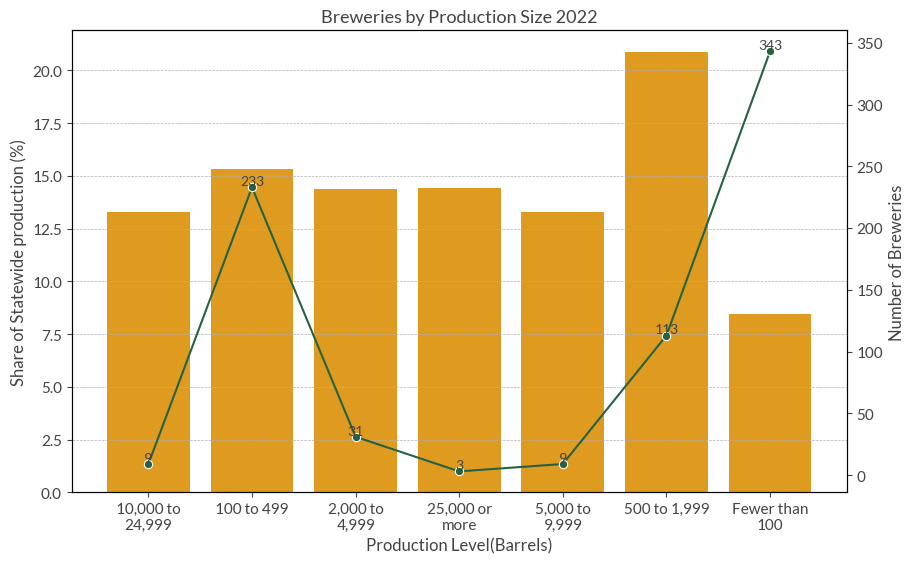

In [9]:


# Define production size ranges
production_ranges = {
    '25,000 or more': (25000, float('inf')),
    '10,000 to 24,999': (10000, 24999),
    '5,000 to 9,999': (5000, 9999),
    '2,000 to 4,999': (2000, 4999),
    '500 to 1,999': (500, 1999),
    '100 to 499': (100, 499),
    'Fewer than 100': (0, 99)
}


# Group breweries by production size range
def get_production_size_range(production):
    for size_range, (lower, upper) in production_ranges.items():
        if lower <= production <= upper:
            return size_range

prod22_melted['production_size_range'] = prod22_melted['production'].apply(get_production_size_range)

# Calculate total production for each size range
total_production_by_range = prod22_melted.groupby('production_size_range')['production'].sum().reset_index()

# Calculate percentage contribution of each size range
total_production_by_range['percentage'] = (total_production_by_range['production'] / total_production_by_range['production'].sum()) * 100

# Calculate count of unique breweries for each size range
unique_brewery_count = prod22_melted.groupby('production_size_range')['brewery'].nunique().reset_index(name='unique_brewery_count')

# Set up the figure
fig, ax1 = plt.subplots(figsize=figsize_h)

# Plot percentage contribution by production size range (bar plot)
sns.barplot(data=total_production_by_range, x='production_size_range', y='percentage', ax=ax1, color=col_yellow)
ax1.set_title('Breweries by Production Size 2022')
ax1.set_xlabel('Production Level(Barrels)')
ax1.set_ylabel('Share of Statewide production (%)')

# Annotate the count of unique breweries on each data point with an offset
for index, row in unique_brewery_count.iterrows():
    ax2.text(index, row['unique_brewery_count'], str(row['unique_brewery_count']), 
             ha='right', va='bottom', fontweight='bold')  # 

# second y-axis for the count of unique breweries
ax2 = ax1.twinx()
sns.lineplot(data=unique_brewery_count, x='production_size_range',
             y='unique_brewery_count', marker='o', color=col_green, ax=ax2)
ax2.set_ylabel('Number of Breweries')

# Annotate the count of unique breweries on each data point
for index, row in unique_brewery_count.iterrows():
    ax2.text(index, row['unique_brewery_count'], str(row['unique_brewery_count']), ha='center', va='bottom')

# Hide gridlines
ax1.grid(axis='y', linestyle='--', linewidth=0.5)
#ax1.tick_params(axis='x', rotation=45)
ax2.grid(False)

# Rotate x-axis labels horizontally in two lines
ax1.set_xticklabels(['\n'.join(wrap(label, 12)) for label in total_production_by_range['production_size_range']])

# Show the plot
plt.show()


In [10]:
# Model implementations
prod22_melted['month'].value_counts()

month
January      388
February     388
March        388
April        388
May          388
June         388
July         388
August       388
September    388
October      388
November     388
December     388
Name: count, dtype: int64

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [14]:
#Data engineering
#prod22_melted['year'] = pd.to_datetime(prod22_melted['year_established'], unit='s').dt.year

## Model D21: Forecasting annual craft beer production levels in Washington State